# Question 1:

Prove if Zipf's law holds true in Natural language or not, using any file in the NLTK package. Save data as a CSV file and prove result through a graph figure.

In [1]:
import nltk.corpus
import glob

In [17]:
# using the brown corpus data to validate the Zipf's law
from nltk.corpus import brown

In [16]:
# Number of files that start with cg* pattern in the brown corpus
len(glob.glob('C:/Users/Ankeeta/Roaming/nltk_data/corpora/brown/cg*')) 


75

In [31]:
# Storing all words in a list for files having pattern cg*. This helps limit the number of files used for validating the law
words=[]
for copyword in glob.glob('C:/Users/Ankeeta/Roaming/nltk_data/corpora/brown/cg*'): 
    #using glob function to read only those file which have the pattern cg* in the filename
    [words.append(word.lower()) for word in brown.words(copyword) if word.isalpha()]
print(words)

['northern', 'liberals', 'are', 'the', 'chief', 'supporters', 'of', 'civil', 'rights', 'and', 'of', 'integration', 'they', 'have', 'also', 'led', 'the', 'nation', 'in', 'the', 'direction', 'of', 'a', 'welfare', 'state', 'and', 'both', 'in', 'their', 'objectives', 'of', 'and', 'of', 'social', 'progress', 'they', 'have', 'had', 'ranged', 'against', 'them', 'the', 'southerners', 'who', 'are', 'called', 'bourbons', 'the', 'name', 'presumably', 'derives', 'from', 'the', 'french', 'royal', 'house', 'which', 'never', 'learned', 'and', 'never', 'forgot', 'since', 'bourbon', 'whiskey', 'though', 'of', 'kentucky', 'origin', 'is', 'at', 'least', 'as', 'much', 'favored', 'by', 'liberals', 'in', 'the', 'north', 'as', 'by', 'conservatives', 'in', 'the', 'south', 'the', 'nature', 'of', 'the', 'opposition', 'between', 'liberals', 'and', 'bourbons', 'is', 'too', 'little', 'understood', 'in', 'the', 'north', 'the', 'race', 'problem', 'has', 'tended', 'to', 'obscure', 'other', 'less', 'emotional', 'issue

In [41]:
# Defining function to calculate the frequency of words in the corpus data and assigning rank, using lambda function
def count_function(a=[]):
    frequency_count={}
    for word in a:
        frequency_count[word]=frequency_count.get(word,0)+1
    sorted_list=sorted(frequency_count.items(), key=lambda x: x[1])
    list= sorted(sorted_list,key=lambda x: x[1],reverse=True)
    return list

In [57]:
import csv
count=1
list = count_function(words) #Using our defined function to assign rank to every word
with open('output.csv', 'w', newline='') as file: # writing into output.csv
    writer = csv.writer(file)
    writer.writerow(['Word','Rank','Frequency']) # This will give the headers to the csv file
    for item in list:
        writer.writerow([item[0],count,item[1]])  # Sorted data according to rank
        count+=1

In [58]:
# Plotting graph for verifying the Zipf's law using matplotlib
import math
import matplotlib.pyplot as plot
xaxis=[] # This list will contain all log values of rank, for plotting
yaxis=[] # This list will contain all log values of frequency, for plotting


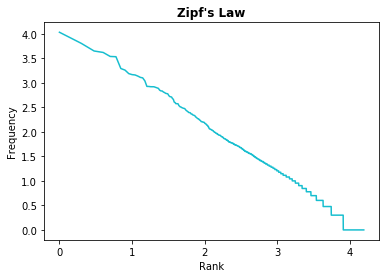

In [60]:
with open('output.csv','r') as file:
    reader=csv.reader(file)
    next(reader,None) # This is to ignore the headers from the csv file
    for row in reader:
        xaxis.append(math.log10(int(row[1])))
        yaxis.append(math.log10(int(row[2])))
plot.plot(xaxis,yaxis)
plot.title("Zipf's Law",fontweight='bold')
plot.xlabel('Rank')
plot.ylabel('Frequency')
plot.show()

Conclusion: The slope between the log of rank and log of frequency is almost a straight line.
Thus, it proves that the Zipf's law works in natural language